1. Написати програми, які обчислюють середню кількість порівнянь в QuickSort за рекурсіями двома способами

I)

In [42]:
def rec1(n):
    c0 = 0
    cs = [c0]
    for i in range(1,n):
        ci = i + 1 + sum([cs[j-1] + cs[i-j] for j in range(1, i+1)])/i
        cs.append(ci)
    return cs[-1]

II)

In [43]:
def rec2(n):
    c0 = 0
    for i in range(1,n):
        ci = ((i+1)/i)*c0 + 2
        c0 = ci
    return c0

In [44]:
rec1(0)

0

In [45]:
rec2(0)

0

In [46]:
rec1(10)

38.57936507936509

In [47]:
rec2(10)

38.57936507936508

2. Провести експерименти та пояснити результати

а) Порівняти час роботи з обчислення С_n першим та другим методом.

In [48]:
from datetime import datetime as dt

In [49]:
microsec1 = 0
for i in range(100):
    
    start = dt.now()
    rec1(1000)
    a = dt.now() - start
    microsec1 += a.microseconds
    if i < 10:
        print(a)
print(microsec1/1000)

0:00:00.206622
0:00:00.171002
0:00:00.182002
0:00:00.152028
0:00:00.166974
0:00:00.146003
0:00:00.176017
0:00:00.141979
0:00:00.192035
0:00:00.153998
15737.926


In [50]:
microsec2 = 0
for i in range(100):
    start = dt.now()
    rec2(1000)
    a = dt.now() - start
    microsec2 += a.microseconds
    if i < 10:
        print(a)
print(microsec2/1000)

0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00
0:00:00.000997
0:00:00
0:00:00
0:00:00
41.982


Обчислення C_n другим методом значно швидше ніж першим, адже у першому методі ми обчислюємо суму з усіх C_j-1 + С_i-j, i=[1,n], j =[1,i], що має велику складність обчислень (O(n^2)). В другому ж методі складність обчислень менша, тому ми витрачаємо на обрахунки значно менше часу.

б) Обчисліть С_n для 10^5 та порівняйте з наближенням отриманим на лекції. Обчисліть похибку цієї апроксимації.

C_n = 2 (n+1)(H_n+1 - 1) ≈ 2(n+1)(ln(n+1) + gamma - 1) 

In [51]:
from numpy import euler_gamma as  g
from math import log as ln
g

0.5772156649015329

In [52]:
n = 10**5
c_n1 = rec2(n)
c_n2 = 2*(n+1)*(ln(n+1) + g - 1) 

error = abs(c_n1 - c_n2)

In [53]:
c_n1

2218029.2259726427

In [54]:
c_n2

2218052.406266612

In [55]:
error

23.180293969344348

На лекції було отримане трохи інше наближення: 

C_n = 2 (n+1)(H_n+1 - 1) ≈ 2(n+1)(ln(n+1) + gamma - 1 + 1/2(n+1) 


Використаємо його:

In [56]:
c_n3 = 2*(n+1)*(ln(n+1) + g - 1 + 1/(2*(n+1)))

In [57]:
c_n3

2218053.4062666125

In [58]:
error = abs(c_n1 - c_n3)

In [59]:
error

24.18029396981001

в) Використайте кращу апроксимацію для гармонічних чисел  H_n для отримання кращої апроксимації чисел C_n.

In [60]:
def harmonic(n):
    s = 0
    for i in range(1,n+1):
        s += 1/i
        #print(s)
    return s

In [61]:
harmonic(6)

2.4499999999999997

In [62]:
c_n3 = 2*(n+1)*(harmonic(n+1) - 1)

In [63]:
c_n3

2218053.406264927

In [64]:
errorh = abs(c_n1 - c_n3)

In [65]:
errorh

24.18029228411615

г) Порівняйте час обчислення за рекурсією (ІІ) та час обчислення наближеного значення

In [66]:
n = 1000

In [67]:
microsec3 = 0
for i in range(100):
    start = dt.now()
    rec2(n)
    a = dt.now() - start
    microsec3 += a.microseconds
print(microsec3/100)

240.06


In [68]:
microsec3 = 0
for i in range(100):
    start = dt.now()
    2*(n+1)*(harmonic(n+1) - 1)
    a = dt.now() - start
    microsec3 += a.microseconds
print(microsec3/100)

159.96


Обчислення наближеного значення C_n в рази швидше ніж обчислення C_n за рекурсією (ІІ)

Реалізуйте QuickSort i MergeSort

In [69]:
def partition(arr, start, stop):
    i = (start-1)        
    pivot = arr[stop]     
    for j in range(start, stop):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[stop] = arr[stop], arr[i+1]
    return (i+1)

def quickSort(arr, start, stop):
    if len(arr) == 1:
        return arr
    if start < stop:
        pi = partition(arr, start, stop)
        quickSort(arr, start, pi-1)
        quickSort(arr, pi+1, stop)

In [70]:
a = [2,1,3,13,0,-2]
quickSort(a,0,len(a)-1)
a

[-2, 0, 1, 2, 3, 13]

In [71]:
def mergeSort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]
        
        mergeSort(left)
        mergeSort(right)

        i = 0
        j = 0
        k = 0
        
        while i < len(left) and j < len(right):
            if left[i] <= right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            arr[k]=right[j]
            j += 1
            k += 1


In [72]:
a = [2,1,3,13,0,-2]
mergeSort(a)
a

[-2, 0, 1, 2, 3, 13]

a) Згенеруйте масиви розміру n = 10^4, 10^5, 10^6 як випадкові перестановки чисел від 1 до n. Порівняйте швидкість роботи QuickSort s MergeSort на цих масивах. Потрібно взяти середній час роботи, згенерувавши по 100 масивів кожної довжини.

In [73]:
from random import shuffle
a = [i for i in range(1000)]
b = [i for i in range(10000)]
c = [i for i in range(100000)]
arrs41 = []
arrs42 = []
arrs51 = []
arrs52 = []
arrs61 = []
arrs62 = []
for i in range(100):
    shuffle(a)
    arrs41.append(a)
    arrs42.append(a)
shuffle(b)
shuffle(c)
arrs51.append(b)
arrs52.append(b)
arrs61.append(c)
arrs62.append(c)

In [100]:
microsec41 = 0
for i in arrs41:
    start = dt.now()
    quickSort(i,0,len(i)-1)
    a = dt.now() - start
    microsec41 += a.microseconds
timeq_4 = microsec41/100
timeq_4

208193.05

In [101]:
microsec42 = 0
for i in arrs42:
    start = dt.now()
    mergeSort(i)
    a = dt.now() - start
    microsec42 += a.microseconds
timem_4 = microsec42/100
timem_4

6375.74

При сортуванні масивів розміру 10^5 та 10^6 буде використовуватись лише один масив, бо при більшій їх кількості комп'ютер не витримує навантажень і перестає проводити обчислення.

In [76]:
start = dt.now()
quickSort(arrs52[0],0,10000-1)
timeq = dt.now() - start
print(timeq)

0:00:00.058835


In [77]:
start = dt.now()
mergeSort(arrs51[0])
timem = dt.now() - start
print(timem)

0:00:00.078503


In [78]:
start = dt.now()
quickSort(arrs61[0],0,100000-1)
a6_q = dt.now() - start
print(a6_q)

0:00:00.674998


In [80]:
start = dt.now()
mergeSort(arrs62[0])
a6_m = dt.now() - start
print(a6_m)

0:00:00.909039


При QuickSort сортуванні масивів розміру 10^5 та 10^6 в середньому витрачається менше часу, ніж при MergeSort. Для масиву розміру 10^4 MergeSort працює швидше.

б) Нехай QuickSort та MergeSort мають час роботи c_q n log(n) c_m n log(n). Знайти ці константи, використавши реальний час роботи для n = 10^4 або  n = 10^5 та зробити прогноз для швидкості роботи цих алгоритмів при n = 10^6 та n = 10^7. Порівняти з реальною швидкістю.

In [102]:
from math import log2 as log

In [115]:
c_m = timem_4/(10**4 * log(10*4))

In [116]:
c_q = timeq_4/(10**4 * log(10*4))

In [117]:
c_m

0.11980131798708454

In [118]:
c_q

3.9119853986754465

Звідси швидкість роботи цих алгоритмів при n = 10^6 та n = 10^7 буде приблизно дорівнювати 

Для QuickSort:

In [119]:
n = 10**6
time_q_6 = c_q * n * log(n)

In [120]:
time_q_6

77972005.21589462

In [121]:
n = 10**7
time_q_7 = c_q * n * log(n)

In [122]:
time_q_7

909673394.1854372

Для MergeSort:

In [123]:
n = 10**6
time_m_6 = c_m * n * log(n)

In [124]:
time_m_6

2387828.184154985

In [125]:
n = 10**7
time_m_7 = c_m * n * log(n)

In [126]:
time_m_7

27857995.48180816

Порівняємо зі справжнім часом:

У масиві величини 10^6 для QuickSort швидкість сортування дорівнювала a6_q = 674998(мікросекунд) , для MergeSort — a6_m = 909039(мікросекунд). Ми можемо бачити, що прогнозований час у мікросекундах (time_m_6 i time_q_6) значно більший. Це може бути пов'язане з тим, що розрахунки відбуваються дуже швидко, і знайдені  c_m та c_q можуть не показувати реальну картину.

Знайдемо час роботи QuickSort та MergeSort для масиву довжини 10^7:

In [137]:
lst = [i for i in range(10**7)]
shuffle(lst)

In [138]:
start = dt.now()
quickSort(lst,0,1000000-1)
a7_q = dt.now() - start
print(a7_q)

0:00:13.470751


In [139]:
shuffle(lst)

In [140]:
start = dt.now()
mergeSort(lst)
a7_m = dt.now() - start
print(a7_m)

0:03:38.804680


Як бачимо, у цьому випадку прогнозований час (27857995.48180816 ≈ 27 секунд для MergeSort та 909673394.1854372 ≈ 15 хвилин для QuickSort) не відповідає реальним результатам.

в) Модифікуємо QuickSort:

In [179]:
global counter


In [524]:
def partition_modified(arr, start, stop):
    global counter
    i = (start-1)        
    pivot = arr[stop]     
    for j in range(start, stop):
        counter += 1
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[stop] = arr[stop], arr[i+1]
    return (i+1)

In [525]:
def quickSort_modified(arr, start, stop):
    global counter
    if len(arr) == 1:
        return arr
    if start < stop:
        pi = partition_modified(arr, start, stop)
        quickSort(arr, start, pi-1)
        quickSort(arr, pi+1, stop)

In [401]:
def func(n):
    global counter
    counter = 0
    a = [i for i in range(n)]
    for i in range(100):
        shuffle(a)
        quickSort_modified(a,0,n-1)
    return counter

In [402]:
counter = 0
func(100)

10000

In [403]:
cn = rec2(n)

In [404]:
cn

12970.94172110068

In [405]:
import matplotlib.pyplot as plt


In [406]:
x = []
y = []
m = 200

In [407]:
for i in range(m):
    x.append(rec2(i))
    y.append(func(i))

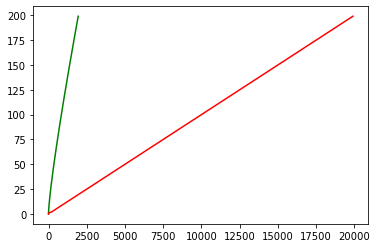

In [522]:
plt.plot(x,[i for i in range(m)], color = "green")
plt.plot(y,[i for i in range(m)], color = "red")

г) Побудуємо гістограми:

In [464]:
n1 = 9
n2 = 10
f1 = factorial(n1)
f2 = factorial(n2)

In [465]:
from math import factorial
from itertools import permutations

In [499]:
lst1 = [i for i in range(n1)]
lst2 = [i for i in range(n2)]

Для QuickSort:

In [526]:
pq1 = permutations(lst1)
pq2 = permutations(lst2)

In [527]:
freq_q1 = {}

In [528]:
for p in pq1:
    counter = 0
    quickSort_modified(list(p),0,n1-1)
    try:
        freq_q1[counter]+= 1
    except:
        freq_q1[counter] = 1
    

In [529]:
freq_q1

{8: 362880}

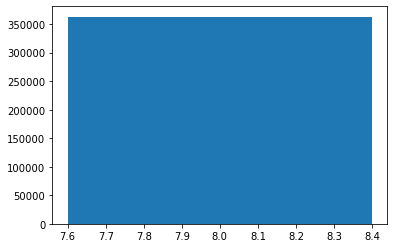

In [530]:
plt.bar(list(freq_q1.keys()), freq_q1.values())
plt.show()

In [531]:
freq_q2 = {}

In [532]:
for p in pq2:
    counter = 0
    quickSort_modified(list(p),0,n2-1)
    try:
        freq_q2[counter]+= 1
    except:
        freq_q2[counter] = 1
       

In [533]:
freq_q2

{9: 3628800}

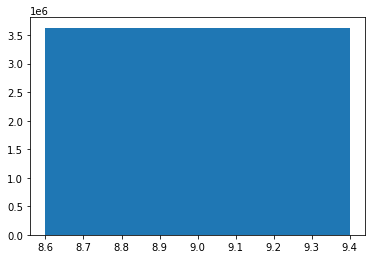

In [534]:
plt.bar(list(freq_q2.keys()), freq_q2.values())
plt.show()

Для MergeSort:

Модифікуємо алгоритм щоб можна було рахувати порівняння:

In [509]:
def mergeSort_modified(arr):
    if len(arr) > 1:
        global counter
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]
        
        mergeSort(left)
        mergeSort(right)
        
        i = 0
        j = 0
        k = 0
        
        while i < len(left) and j < len(right):
            counter += 1
            if left[i] <= right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1

In [510]:
pm1 = permutations(lst1)
pm2 = permutations(lst2)

In [511]:
freq_m1 = {}

In [512]:
for p in pm1:
    counter = 0
    mergeSort_modified(list(p))
    try:
        freq_m1[counter] += 1
    except:
        freq_m1[counter] = 1

In [513]:
freq_m1

{4: 2880, 5: 14400, 6: 43200, 7: 100800, 8: 201600}

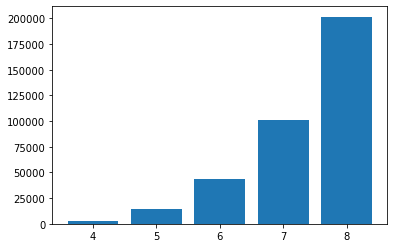

In [515]:
plt.bar(list(freq_m1.keys()), freq_m1.values())
plt.show()

In [516]:
freq_m2 = {}

In [517]:
for p in pm2:
    counter = 0
    mergeSort_modified(list(p))
    try:
        freq_m2[counter] += 1
    except:
        freq_m2[counter] = 1

In [518]:
freq_m2

{5: 28800, 6: 144000, 7: 432000, 8: 1008000, 9: 2016000}

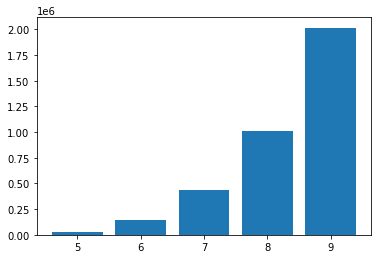

In [519]:
plt.bar(list(freq_m2.keys()), freq_m2.values())
plt.show()